In [36]:
import numpy as np
import pandas as pd
import string
import seaborn as sns
import nltk
#The VADER lexicon is a list of words with associated sentiment scores, helping in sentiment analysis.
nltk.download('vader_lexicon')
nltk.download('stopwords')
import spacy      #Imports the spaCy library, a natural language processing (NLP) library.
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import wordcloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
nlp=spacy.load('en_core_web_sm')
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [6]:
path = "/content/Elon_musk.csv"
df=pd.read_csv(path,encoding="ISO-8859-1")

In [7]:
len(df)

1999

In [8]:


df.Text



0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

## text preprocessing

In [9]:
df_1 = [x.strip() for x in df.Text] # remove both the leading and the trailing characters
df_2 = [x for x in df_1 if x] # removes empty strings, because they are considered in Python as False
df_2[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

### Removing punctuation

In [10]:
import re #regular expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    return text
clean = lambda x: clean_text(x)

In [11]:


df['text'] = df.Text.apply(clean)

df['text']



0                                    kunalb  im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                           gtera  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                             progress update august  
Name: text, Length: 1999, dtype: object

In [12]:
df

,Unnamed: 0,Text,text
0,1,@kunalb11 Im an alien,kunalb im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...
...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...
1995,1996,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is


### Stop Words removal

In [16]:
stop_word=pd.read_csv("stop.txt",header=None)

st_word = [i for i in stop_word[0]]



In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
stop= stopwords.words('english')
my_stop_words= stop.copy()
#add more stop words
for i in st_word:
    my_stop_words.append(i)
print(len(my_stop_words))
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in my_stop_words))





750


###
Sentiment Analysis

In [22]:


from nltk.sentiment.vader import SentimentIntensityAnalyzer



In [23]:


sid = SentimentIntensityAnalyzer()
def sentiment_scores(text):

    sentiment_dict = sid.polarity_scores(text)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Sentence Overall Rated As", end = " ")

    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")

    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")

    else :
        print("Neutral")



In [24]:
x=SentimentIntensityAnalyzer().polarity_scores(df['text'][2])

x=SentimentIntensityAnalyzer().polarity_scores(df['text'][4])
df['text'][4]



'teslacn congratulations tesla china amazing execution year'

In [25]:


x



{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'compound': 0.8271}

In [26]:


df['scores']=df['text'].apply(lambda text: sid.polarity_scores(text))
df.head()



,Unnamed: 0,Text,text,scores
0,1,@kunalb11 Im an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp..."
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp..."


In [27]:
df['compound']=df['scores'].apply(lambda score_dict: score_dict['compound'])
df.head()

,Unnamed: 0,Text,text,scores,compound
0,1,@kunalb11 Im an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271


In [28]:


df['neg']=df['scores'].apply(lambda score_dict: score_dict['neg'])
df.head()



,Unnamed: 0,Text,text,scores,compound,neg
0,1,@kunalb11 Im an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,0.000
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,0.512
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271,0.000


In [29]:


df['pos']=df['scores'].apply(lambda score_dict: score_dict['pos'])
df.head()



,Unnamed: 0,Text,text,scores,compound,neg,pos
0,1,@kunalb11 Im an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,0.000,0.577
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,0.512,0.000
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271,0.000,0.606


In [30]:


df['neu']=df['scores'].apply(lambda score_dict: score_dict['neu'])
df.head()



,Unnamed: 0,Text,text,scores,compound,neg,pos,neu
0,1,@kunalb11 Im an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,0.000,0.577,0.423
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,0.512,0.000,0.488
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271,0.000,0.606,0.394


In [31]:
df['comp_score']=df['compound'].apply(lambda c: 'pos' if c >= 0 else 'neg')
df.head()

,Unnamed: 0,Text,text,scores,compound,neg,pos,neu,comp_score
0,1,@kunalb11 Im an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,0.000,0.577,0.423,pos
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,0.512,0.000,0.488,neg
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271,0.000,0.606,0.394,pos


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['compound'].plot(kind='hist', bins=20, title='compound')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['neg'].plot(kind='hist', bins=20, title='neg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['pos'].plot(kind='hist', bins=20, title='pos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('comp_score').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Unnamed: 0', y='compound', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='compound', y='neg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='neg', y='pos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='pos', y='neu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['compound']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Text')):
  _plot_series(series, series_name, i)
  fig.legend(title='Text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('compound')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['compound']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('compound')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['compound']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('comp_score')):
  _plot_series(series, series_name, i)
  fig.legend(title='comp_score', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('compound')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['neg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Text')):
  _plot_series(series, series_name, i)
  fig.legend(title='Text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('neg')

from matplotlib import pyplot as plt
_df_15['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['compound'].plot(kind='line', figsize=(8, 4), title='compound')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['neg'].plot(kind='line', figsize=(8, 4), title='neg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['pos'].plot(kind='line', figsize=(8, 4), title='pos')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_19.groupby('Text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Text')
_ = plt.ylabel('text')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['comp_score'].value_counts()
    for x_label, grp in _df_20.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('comp_score')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Unnamed: 0', y='Text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Unnamed: 0', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['comp_score'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Unnamed: 0', y='comp_score', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='compound', y='Text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [32]:
df['neg'].value_counts()

0.000    1737
0.231       7
0.097       5
0.252       5
0.130       5
         ... 
0.159       1
0.090       1
0.605       1
0.397       1
0.310       1
Name: neg, Length: 172, dtype: int64

In [33]:


df['pos'].value_counts()



0.000    1276
0.375      17
0.672      15
0.412      12
0.583      12
         ... 
0.456       1
0.704       1
0.649       1
0.240       1
0.317       1
Name: pos, Length: 307, dtype: int64

In [34]:


df['compound'].value_counts()



 0.0000    1116
 0.6249      54
 0.4588      48
 0.4215      47
 0.4404      42
           ... 
 0.8155       1
-0.7430       1
-0.7717       1
-0.4576       1
-0.7650       1
Name: compound, Length: 130, dtype: int64

In [35]:
df['neu'].value_counts()

1.000    1108
0.625      19
0.588      17
0.328      15
0.833      12
         ... 
0.296       1
0.351       1
0.496       1
0.420       1
0.380       1
Name: neu, Length: 328, dtype: int64

<Axes: xlabel='neu', ylabel='Density'>

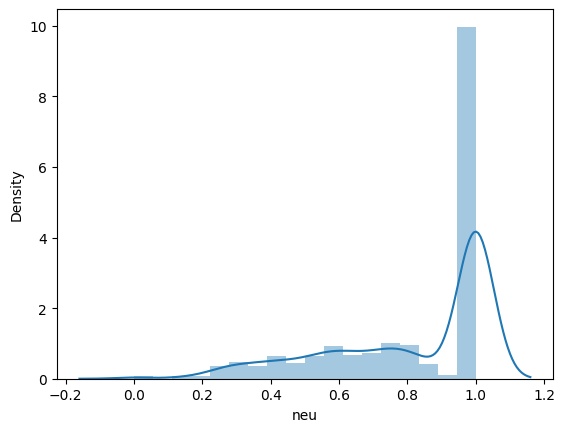

In [41]:
df_filtered = df[df['neu'].notna()]
sns.distplot(df_filtered['neu'])

<Axes: xlabel='neu', ylabel='compound'>

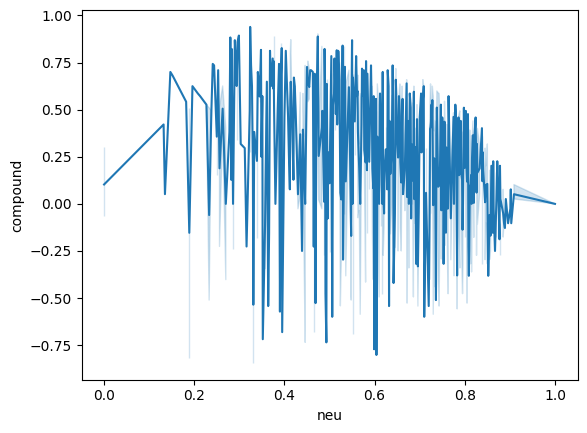

In [59]:
sns.lineplot(y='compound',x='neu',data=df)

<Axes: xlabel='neg', ylabel='pos'>

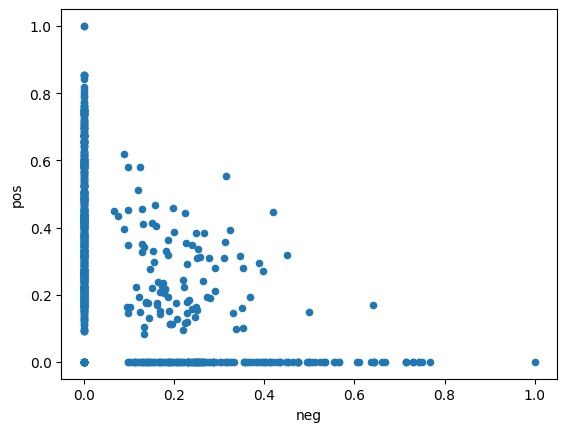

In [61]:
df.plot.scatter(x='neg',y='pos')


###
Tokenization

In [ ]:
from nltk.tokenize import word_tokenize
text_1= [x.strip() for x in df.text] # remove both the leading and the trailing characters
text_2= [x for x in text_1 if x] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
text_3 = ' '.join(text_2)
len(text_3)

107235

In [ ]:


import nltk
nltk.download('punkt')
df_token= word_tokenize(text_3)
df_token



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['kunalb',
 'im',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera',
 'doge',
 'underestimated',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'year',
 'happy',
 'year',
 'ox',
 'httpstco',
 'wfkmyu',
 'oj',
 'frodo',
 'underdogeall',
 'thought',
 'failhimself',
 'httpstcozgxjfdzzrm',
 'owensparks',
 'flcnhvy',
 'anonyx',
 'haha',
 'flcnhvy',
 'anonyx',
 'tweets',
 'represent',
 'realworld',
 'time',
 'allocation',
 'entertaining',
 'outcome',
 'givedirectly',
 'agree',
 'clubhouse',
 'kanyewest',
 'httpstco',
 'rwe',
 'uhsts',
 'geoffkeighley',
 'unrealengine',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'toddler',
 'hodler',
 'joshmanmode',
 'issues',
 'sentencing',
 'bit',
 'high',
 'freewalletorg',
 'fixing',
 'freewalletorg',
 'unlock',
 'account',
 'astrojordy',
 'true',
 'power',
 'haha',
 'httpstcofc',
 'uhqsd',
 'freewalletorg',
 'crypto',
 'wallet',
 'wont'

###
Noramalization

In [ ]:
lower_words = [x.lower() for x in df_token]
print(lower_words[0:25])

['kunalb', 'im', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'year', 'happy', 'year']


### Stemming

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb', 'im', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'year', 'happi', 'year', 'ox', 'httpstco', 'wfkmyu', 'oj', 'frodo', 'underdogeal', 'thought', 'failhimself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx', 'haha', 'flcnhvi', 'anonyx']


### removing stop words

In [ ]:
no_stop_stemmed= [word for word in stemmed_tokens if not word in my_stop_words]

In [ ]:
print(len(stemmed_tokens))
print(len(no_stop_stemmed))

12963
12869


In [ ]:


import spacy

nlp = spacy.load('en_core_web_sm')



Lemmatization

In [ ]:


# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_stemmed))
print(doc[0:40])



kunalb im alien idaacarmack ray trace cyberpunk hdr nextlevel joerogan spotifi great interview gtera doge underestim teslacn congratul tesla china amaz execut year happi year ox httpstco wfkmyu oj frodo underdogeal thought failhimself httpstcozgxjfdzzrm owenspark flcnhvi anonyx haha flcnhvi


In [ ]:


lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])



['kunalb', 'i', 'm', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'year', 'happi']


###
feature extraction

In [ ]:


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
X



<12960x4587 sparse matrix of type '<class 'numpy.int64'>'
	with 12895 stored elements in Compressed Sparse Row format>

In [ ]:
X.shape

(12960, 4587)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

count_vect_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
count_vect_df.head()



,ab,aber,abo,aboard,abort,absenc,absolut,absorb,absorpt,absurd,...,zshauladventur,zsyalvczx,ztn,zubinanari,zvm,zwiebelbach,zxd,zz,zzcool,ðogecoin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(30)
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).tail(30)


,0
zbt,4557
zcf,4558
zczinfc,4559
zddfql,4560
zealand,4561
zeitma,4562
zenit,4563
zg,4564
zihfeg,4565
zikryzamir,4566


In [ ]:
#Bi-gram
def get_top_n2_words(corpus,ngram_range, n=None):
    vec1 = CountVectorizer(ngram_range=ngram_range,  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(df["text"],ngram_range=(3,3), n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()



,Bi-gram,Freq
0,rt spacex falcon,17
1,spacex falcon stage,8
2,thesheetztweetz waemd spacex,8
3,jgrano teslaratiteam teslarati,8
4,ppathole thesheetztweetz waemd,7


In [ ]:
get_top_n2_words(df["text"],ngram_range=(3,3), n=200) #trigram

[('rt spacex falcon', 17),
 ('spacex falcon stage', 8),
 ('thesheetztweetz waemd spacex', 8),
 ('jgrano teslaratiteam teslarati', 8),
 ('ppathole thesheetztweetz waemd', 7),
 ('waemd spacex spacexstarlink', 7),
 ('falcon stage landed', 6),
 ('rt spacex liftoff', 6),
 ('spacex spacexstarlink wanationalguard', 6),
 ('spacex felixschlang marcushousegame', 5),
 ('rt spacex dragon', 5),
 ('rt spacex crew', 5),
 ('neopork casparstanley ercxspace', 5),
 ('casparstanley ercxspace marcushousegame', 5),
 ('ercxspace marcushousegame felixschlang', 5),
 ('erdayastronaut joshbickett ajtourville', 4),
 ('joshbickett ajtourville spacex', 4),
 ('spacex falcon launches', 4),
 ('tjcooney lrocket spacex', 4),
 ('lrocket spacex felixschlang', 4),
 ('landed love droneship', 4),
 ('mirojurcevic tashaark spacestation', 4),
 ('dragons operational mission', 4),
 ('rt spacex deployment', 4),
 ('kristennetten boringcompany tesla', 4),
 ('brendan bocachicagal nasaspaceflight', 4),
 ('alexavoigt mikezimon wholemar

Text(0.5, 1.0, 'WordCloud')

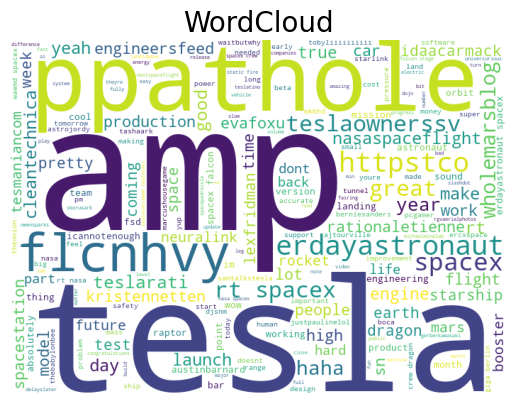

In [ ]:
txt = ' '.join(df['text'])

wc = WordCloud(background_color='white', width=700, height=500).generate(txt)

plt.imshow(wc)
plt.axis('off')
plt.title('WordCloud',size = 20)

